#I. Perkenalan
Nama : Hafidz Muta'ali

Batch : FTDS 006

Clustering Life Expetancy


---

This dataset contains 6 columns and 223 Rows. Each row corresponds to a country in order of their life expectancy rank. The dataset has three numeric columns, Overall Life Expectancy, Male Life Expectancy and Female Life Expectancy.
The last column is Continent, which defines which continent that country lies in. This could be very well used as a class for the data.

#II. Import Pustaka

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline

#III. Data Loading

In [84]:
dfraw=pd.read_csv('https://raw.githubusercontent.com/hafidzali04/Hacktiv8-phase0/main/data/Life_expectancy_dataset.csv', encoding='latin1')
pd.set_option('display.max_columns', None)
dfraw

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


#IV. Data Cleaning

In [85]:
dfraw.info() #Check Tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [86]:
#Check Duplicate
dfraw.duplicated().sum()

0

In [87]:
#Check Missing Values
dfraw.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

In [88]:
dfraw = dfraw.drop('Country', axis=1)

In [89]:
dfclean = dfraw.copy()

#V. EDA

In [90]:
dfclean.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


Dari describe data diatas dapat diambil suatu insight yaitu:
* Min Male life expectancy 48.6
* Max Male life expectancy 85.6
* Min Female life expectancy 51
* Max Female life expectancy 93.5
* Min Overall 50.2
* Max Overall 86.5

Female life expectancy lebih tinggi dari pada male life expectancy

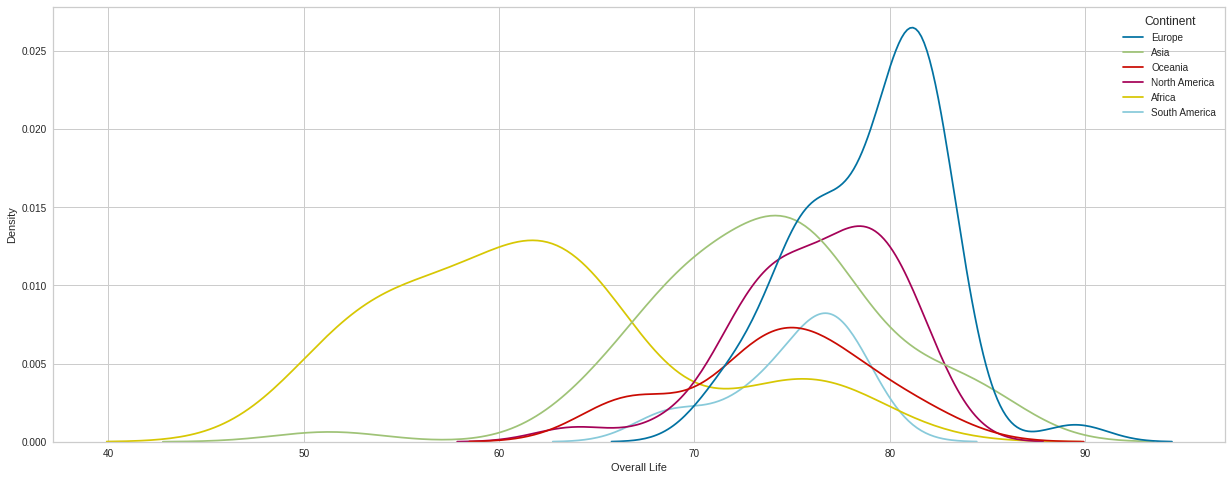

In [91]:
plt.figure(figsize=(21,8))
sns.kdeplot(data = dfclean, x=dfclean['Overall Life'], hue=dfclean['Continent'])

Dari visualisasi diatas dapat dilihat bahwa: 
* life expectancy benua eropa paling tinggi dari benua lain nya
* life expectancy benua africa paling rendah dari benua lain nya

#VI. Data Preprocessing


In [92]:
numerical = dfclean[['Overall Life', 'Male Life', 'Female Life']]
numerical

,Overall Life,Male Life,Female Life
0,89.5,85.6,93.5
1,85.0,81.7,88.5
2,85.0,82.3,87.8
3,84.5,81.6,87.6
4,83.3,80.7,86.1
...,...,...,...
218,52.1,51.6,52.5
219,51.6,52.2,51.0
220,51.3,49.9,52.7
221,50.6,48.6,52.7


In [93]:
scaler = StandardScaler()
numscaled = scaler.fit_transform(numerical)

#VII. Pendefisian Model

##KMeans

In [94]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(numscaled)

KMeans(n_clusters=2)

In [95]:
print(kmeans.labels_)
print(kmeans.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
181.3102595317642


## Evaluasi KMeans 

###Elbow Method

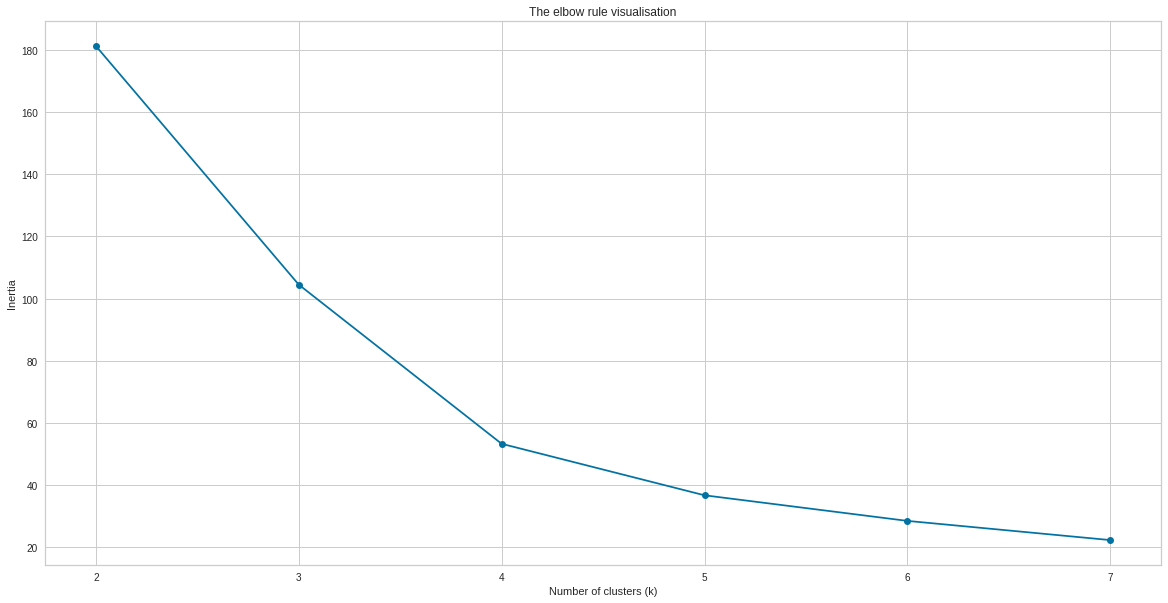

In [96]:
options = range(2,8)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, init='k-means++').fit(numscaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("The elbow rule visualisation")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia');

Dari patahan Elbow Method n_cluster terbaik bisa diambil antara 3 atau 4 cluster

In [97]:
for i in range (2,8):
  score = silhouette_score(numscaled, KMeans(n_clusters=i).fit_predict(numscaled))
  print(f'For n_clusters {i} Silhouette Score is:', '%.2f' % score)


For n_clusters 2 Silhouette Score is: 0.66
For n_clusters 3 Silhouette Score is: 0.51
For n_clusters 4 Silhouette Score is: 0.54
For n_clusters 5 Silhouette Score is: 0.52
For n_clusters 6 Silhouette Score is: 0.48
For n_clusters 7 Silhouette Score is: 0.48


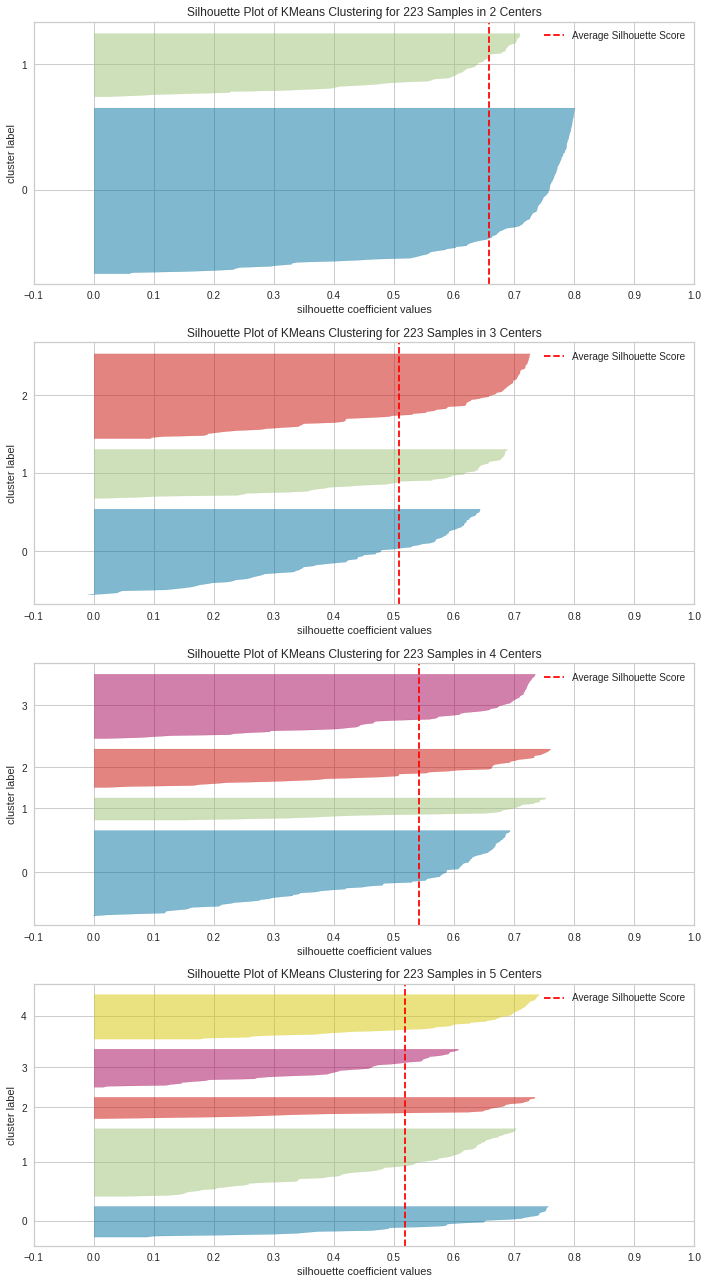

In [98]:
k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(numscaled)
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

Dari Hasil visualisasi silhouette score n cluster 4 lebih merata dari pada cluster 2 3 ataupun 5, jadi akan dipakai n cluster 4 untuk algortima KMeans

In [102]:
km = KMeans(n_clusters=4)
km.fit(numscaled)

label = km.labels_

In [103]:
dfcluster = pd.concat([pd.DataFrame({'cluster':label}),dfclean], axis=1)
dfcluster

,cluster,Rank,Overall Life,Male Life,Female Life,Continent
0,3,1,89.5,85.6,93.5,Europe
1,3,2,85.0,81.7,88.5,Asia
2,3,3,85.0,82.3,87.8,Asia
3,3,4,84.5,81.6,87.6,Asia
4,3,5,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,1,219,52.1,51.6,52.5,Africa
219,1,220,51.6,52.2,51.0,Africa
220,1,221,51.3,49.9,52.7,Asia
221,1,222,50.6,48.6,52.7,Africa


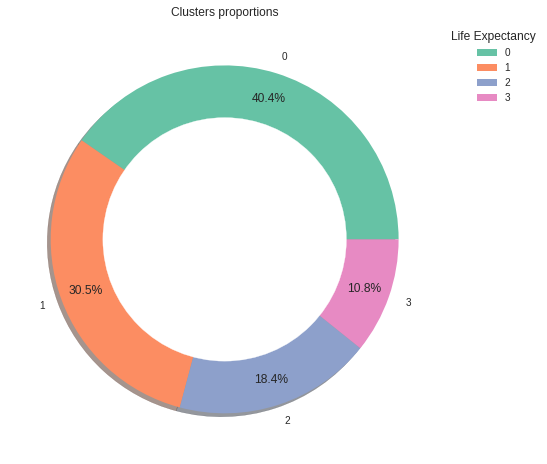

In [104]:
sizes = dict(dfcluster['cluster'].value_counts())
palet= sns.color_palette('Set2')

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palet)
plt.legend(title="Life Expectancy", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

###PCA + KMeans

In [105]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numscaled)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':label})], axis=1)

In [106]:
pca_df

,x1,x2,cluster
0,-3.468599,-0.091908,3
1,-2.559335,-0.039879,3
2,-2.557261,0.067979,3
3,-2.460010,0.022324,3
4,-2.216841,0.061627,3
...,...,...,...
218,4.166172,0.157309,1
219,4.253993,0.328284,1
220,4.329837,-0.007666,1
221,4.470880,-0.121758,1


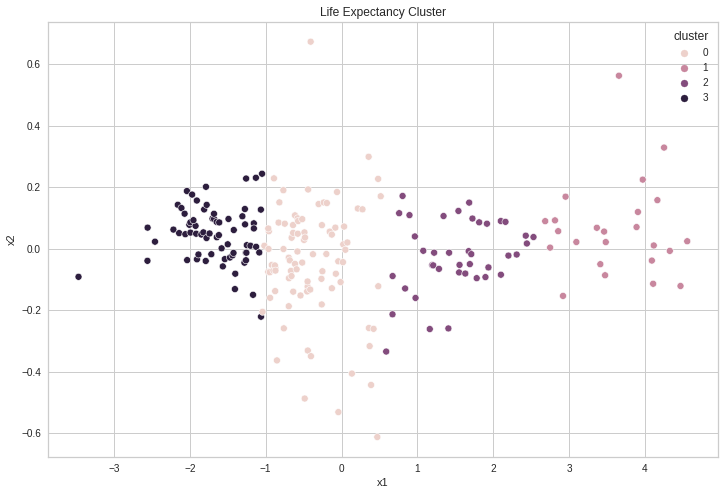

In [107]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x='x1',y='x2', hue='cluster', data=pca_df)
plt.title('Life Expectancy Cluster')
plt.show()

#VIII. Kesimpulan

##Cluster 0

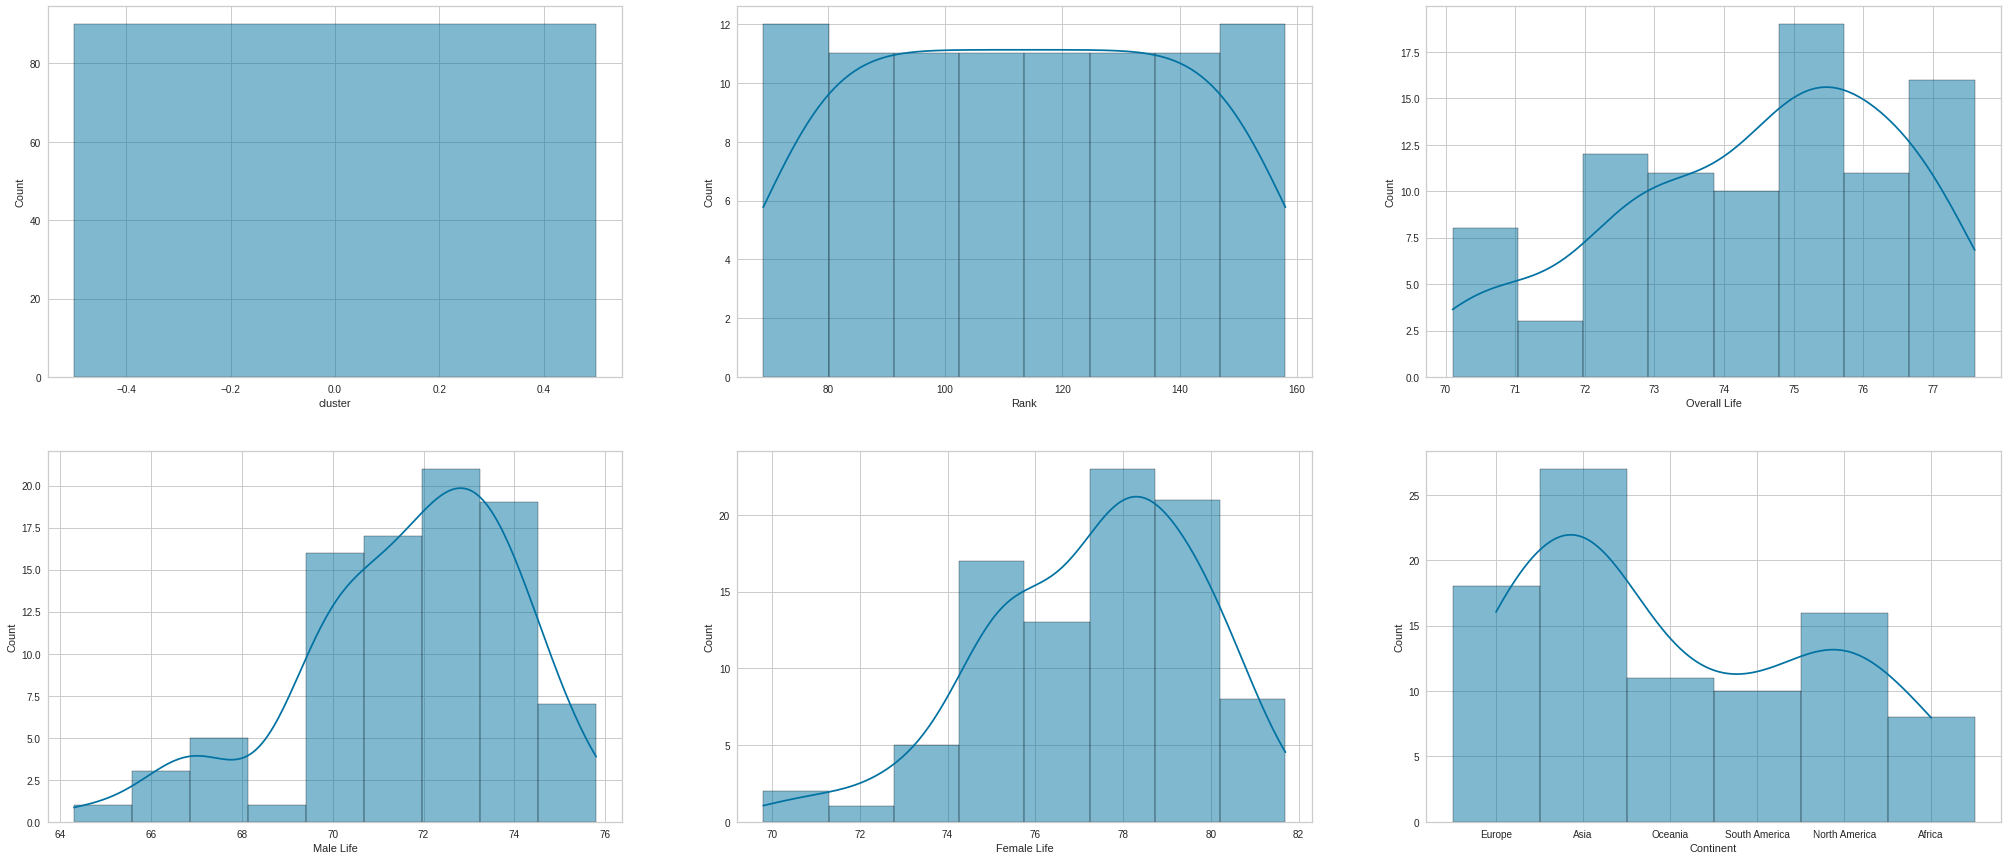

In [111]:
plt.figure(figsize=(35,15))

for i, col in enumerate(list(dfcluster[dfcluster['cluster']==0].columns)):
  i +=1
  plt.subplot(2,3,i)
  sns.histplot(data=dfcluster[dfcluster['cluster']==0], x=dfcluster[dfcluster['cluster']==0][col], kde=True)

Dari cluster 0 dapat diambil kesimpulan:
* Rank 75 - 155
* Overall life expectancy antara 70 -78
* Male life expectancy antara 65 - 76
* Female life expectancy antara 70 - 81
* Cluster 0 di isi oleh benua Europe, Asia, Oceania, South America, North America, Africa
* Cluster 0 paling banyak di isi negara dari benua Asia

##Cluster 1

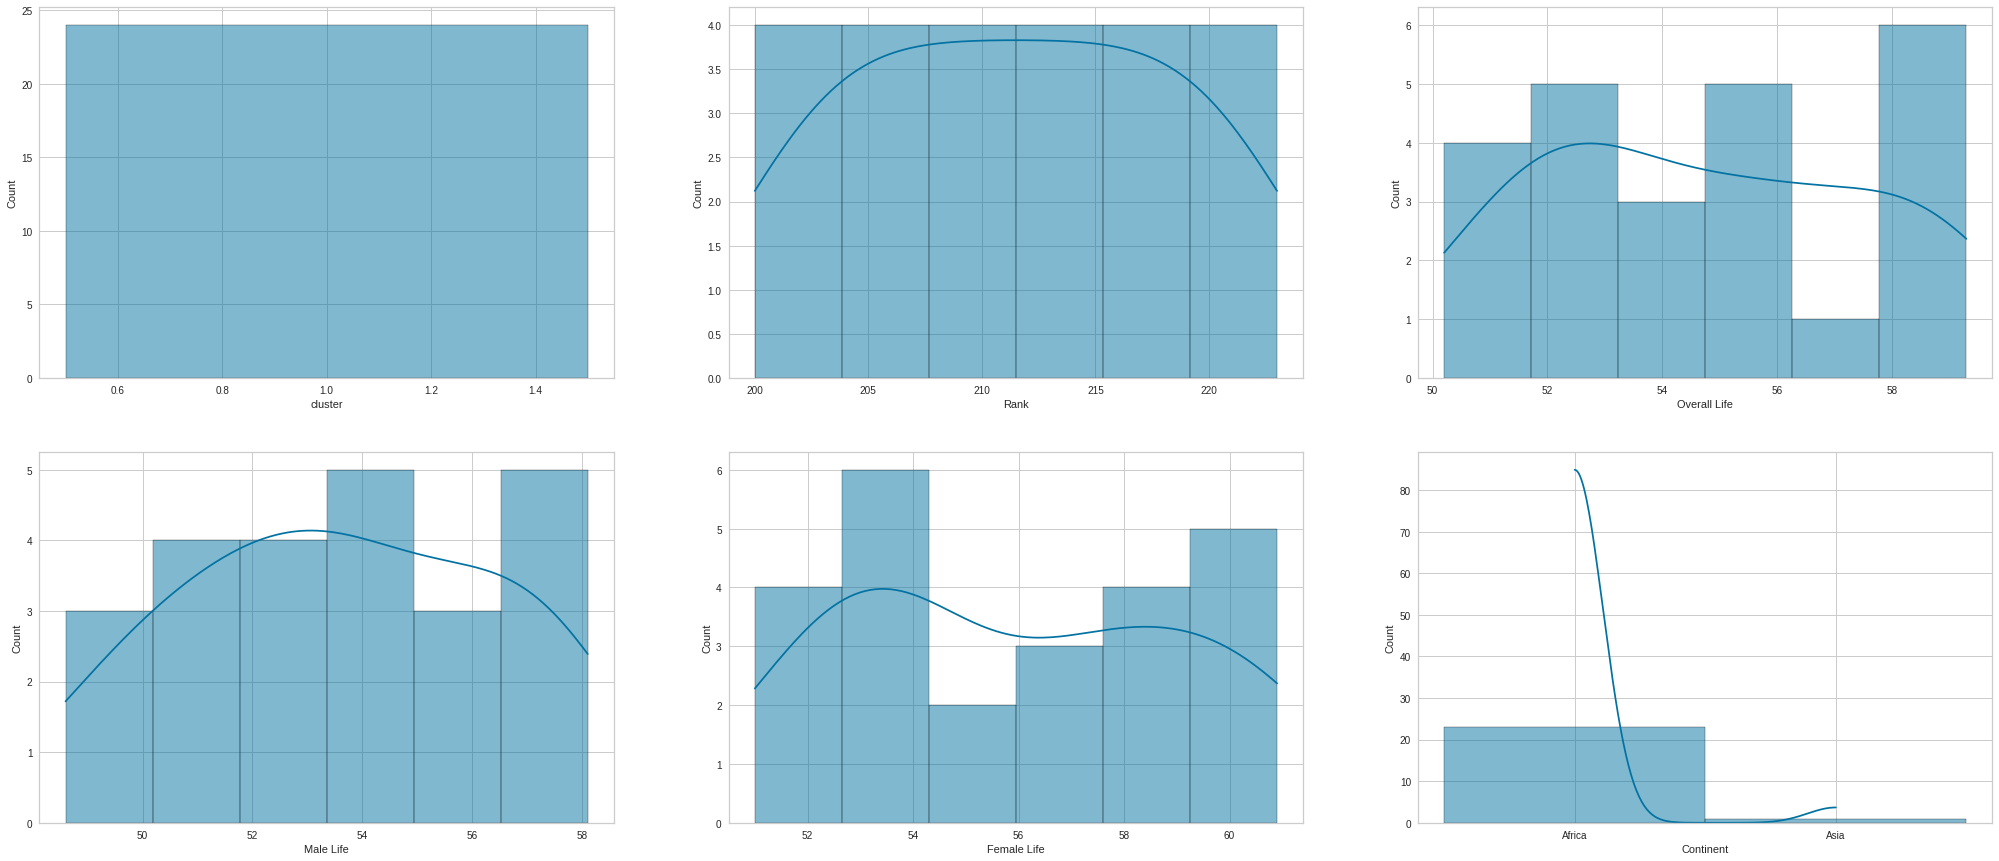

In [112]:
plt.figure(figsize=(35,15))

for i, col in enumerate(list(dfcluster[dfcluster['cluster']==1].columns)):
  i +=1
  plt.subplot(2,3,i)
  sns.histplot(data=dfcluster[dfcluster['cluster']==1], x=dfcluster[dfcluster['cluster']==1][col], kde=True)

Dari cluster 1 dapat diambil kesimpulan:
* Rank 200 - 220
* Overall life expectancy antara 50 -58
* Male life expectancy antara 50 - 58
* Female life expectancy antara 52 - 80
* Cluster 1 di isi oleh benua Afrika dan Asia
* Cluster 1 paling banyak di isi negara dari benua Afrika

##Cluster 2

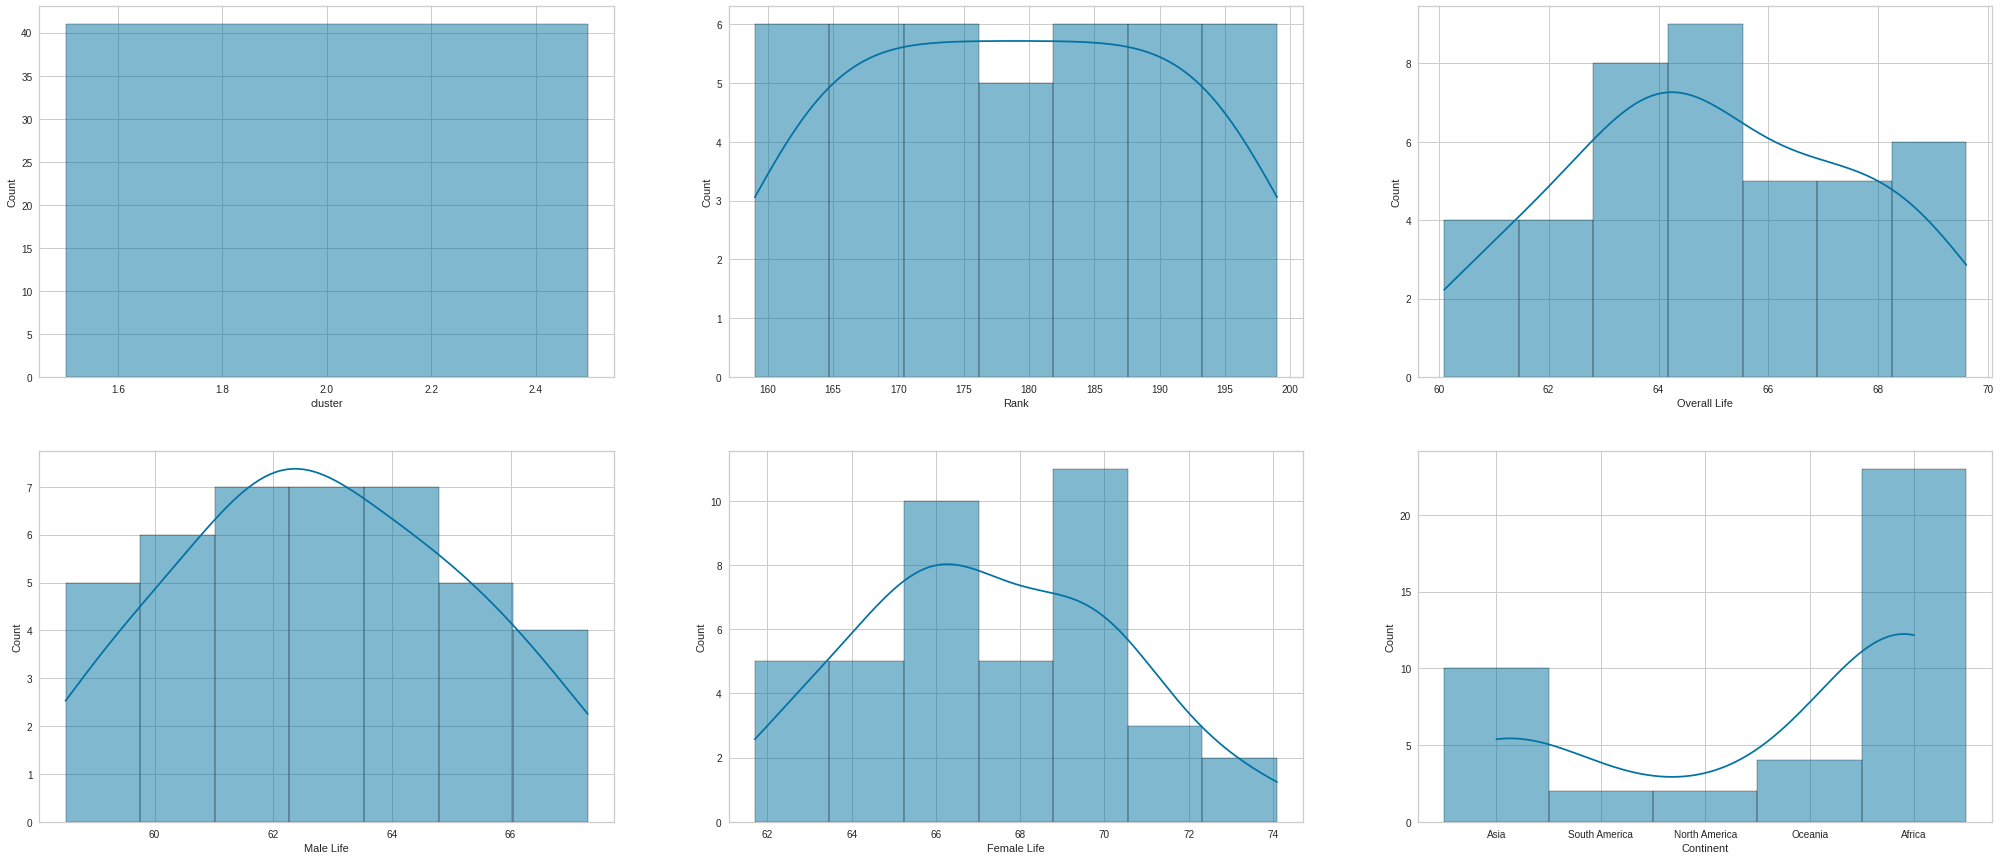

In [114]:
plt.figure(figsize=(35,15))

for i, col in enumerate(list(dfcluster[dfcluster['cluster']==2].columns)):
  i +=1
  plt.subplot(2,3,i)
  sns.histplot(data=dfcluster[dfcluster['cluster']==2], x=dfcluster[dfcluster['cluster']==2][col], kde=True)

Dari cluster 2 dapat diambil kesimpulan:
* Rank 160 - 200
* Overall life expectancy antara 60 -70
* Male life expectancy antara 65 - 67
* Female life expectancy antara 62 - 74
* Cluster 2 di isi oleh benua Asia, South America, North America, Oceania, Africa
* Cluster 2 paling banyak di isi negara dari benua Africa

##Cluster 3

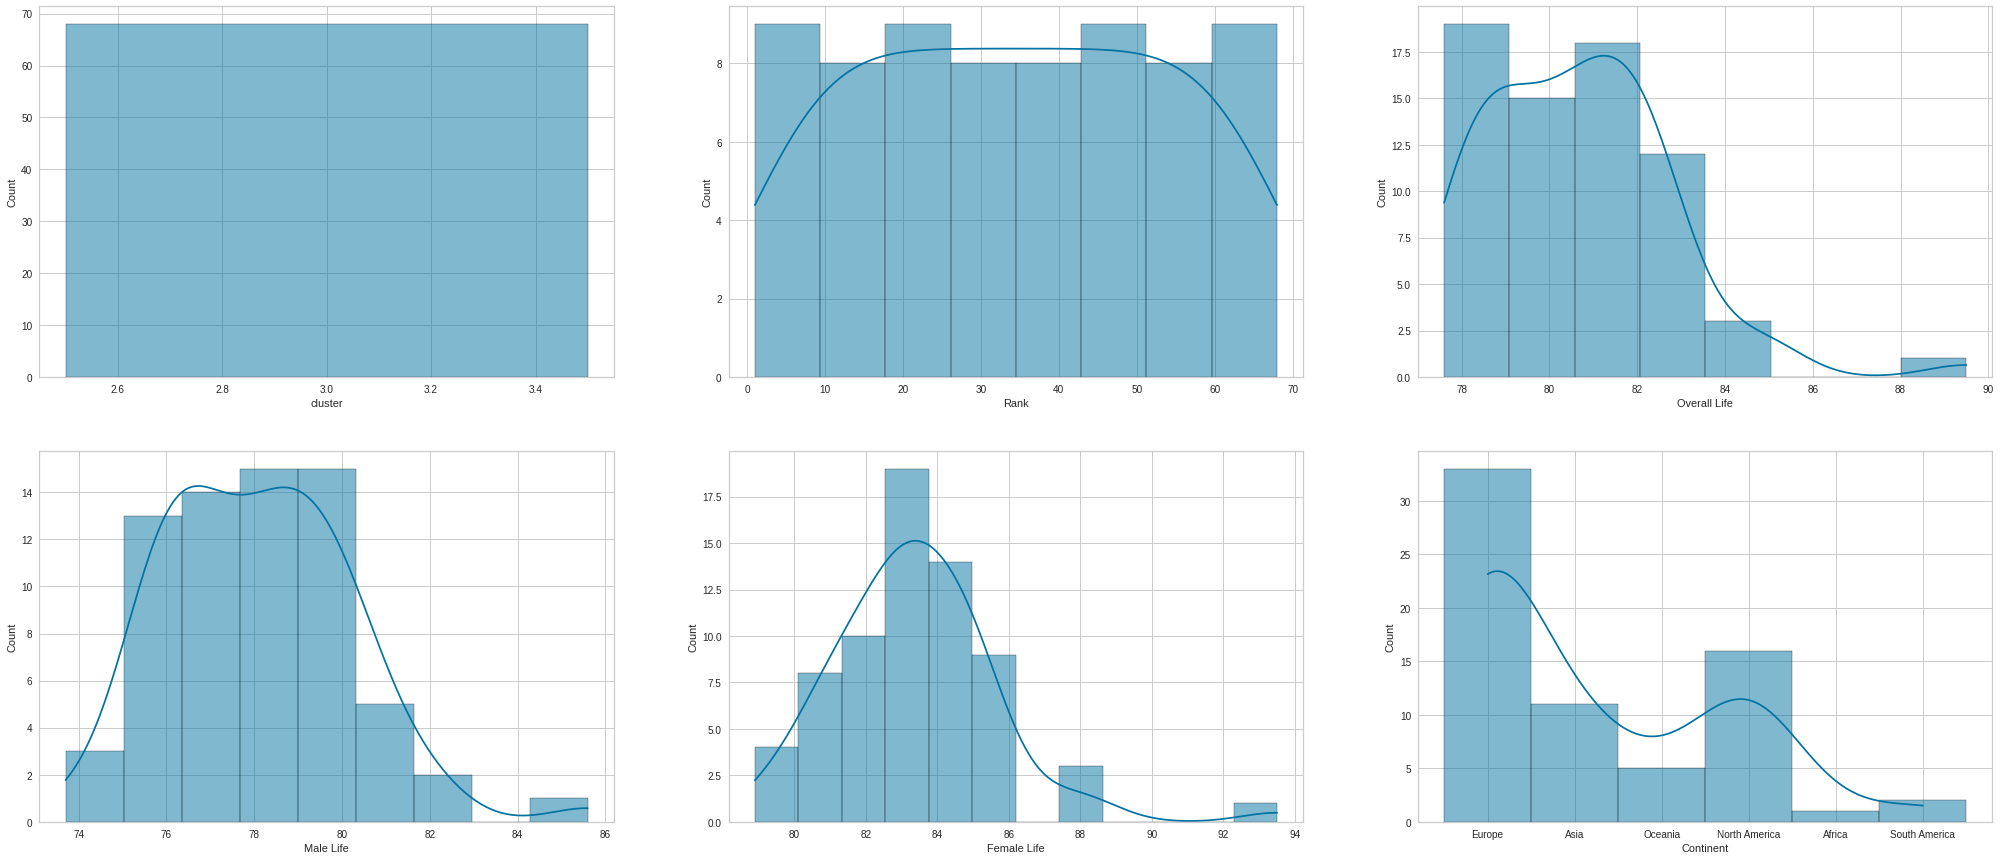

In [115]:
plt.figure(figsize=(35,15))

for i, col in enumerate(list(dfcluster[dfcluster['cluster']==3].columns)):
  i +=1
  plt.subplot(2,3,i)
  sns.histplot(data=dfcluster[dfcluster['cluster']==3], x=dfcluster[dfcluster['cluster']==3][col], kde=True)

Dari cluster 3 dapat diambil kesimpulan:
* Rank 0 - 70
* Overall life expectancy antara 78 - 90
* Male life expectancy antara 74 - 86
* Female life expectancy antara 80 - 93
* Cluster 3 di isi oleh benua Europe, Asia, Oceania, North America, Africa, South America
* Cluster 3 paling banyak di isi negara dari benua Europe